In [6]:
import pandas as pd

# Pastikan jalur file sesuai dengan struktur folder Anda
file_path = 'data/ulasan_produk.csv'

try:
    df = pd.read_csv(file_path)
    print("Data berhasil dimuat.")
    print("Bentuk data:", df.shape)
    print("\n5 baris pertama data:")
    print(df.head())
    print("\nInformasi kolom:")
    df.info()
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan. Pastikan file berada di folder 'data'.")

Data berhasil dimuat.
Bentuk data: (8, 2)

5 baris pertama data:
                                              ulasan  \
0  Produk ini sangat bagus dan berfungsi dengan b...   
1  Pengiriman cepat dan kualitas produk luar bias...   
2                       Agak kecewa dengan produknya   
3                             Kualitasnya biasa saja   
4                Pelayanan pelanggan sangat membantu   

                                        sentimen  
0                                        positif  
1                                        positif  
2   tidak sesuai ekspektasi. Cukup buruk.negatif  
3        tidak ada yang istimewa. Lumayan.netral  
4           produknya juga top markotop!.positif  

Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ulasan    8 non-null      object
 1   sentimen  8 non-null      object
dtypes: object(2)
memo

In [15]:
import nltk
import re
from nltk.corpus import stopwords

# Unduh stopwords (kalau belum)
nltk.download('stopwords')

stop_words_id = set(stopwords.words('indonesian'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Ganti word_tokenize ke split karena lebih ringan dan bebas error
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words_id]
    return ' '.join(filtered_tokens)

# Terapkan ke DataFrame
df['ulasan_bersih'] = df['ulasan'].apply(preprocess_text)
print(df[['ulasan', 'ulasan_bersih']].head())


                                              ulasan  \
0  Produk ini sangat bagus dan berfungsi dengan b...   
1  Pengiriman cepat dan kualitas produk luar bias...   
2                       Agak kecewa dengan produknya   
3                             Kualitasnya biasa saja   
4                Pelayanan pelanggan sangat membantu   

                                  ulasan_bersih  
0                   produk bagus berfungsi puas  
1  pengiriman cepat kualitas produk rekomendasi  
2                              kecewa produknya  
3                                   kualitasnya  
4                  pelayanan pelanggan membantu  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gelin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
from collections import Counter

# Gabungkan semua teks ulasan bersih menjadi satu string besar
all_words = ' '.join(df['ulasan_bersih']).split()

# Hitung frekuensi kata
word_counts = Counter(all_words)

# Tampilkan 20 kata teratas
print("\n20 Kata Teratas Keseluruhan:")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")

# Eksplorasi Kata Kunci berdasarkan Sentimen
print("\n--- Eksplorasi Kata Kunci Berdasarkan Sentimen ---")

# Filter ulasan positif
positive_reviews = df[df['sentimen'] == 'positif']['ulasan_bersih']
all_positive_words = ' '.join(positive_reviews).split()
positive_word_counts = Counter(all_positive_words)
print("\n20 Kata Teratas di Ulasan Positif:")
for word, count in positive_word_counts.most_common(20):
    print(f"{word}: {count}")

# Filter ulasan negatif
negative_reviews = df[df['sentimen'] == 'negatif']['ulasan_bersih']
all_negative_words = ' '.join(negative_reviews).split()
negative_word_counts = Counter(all_negative_words)
print("\n20 Kata Teratas di Ulasan Negatif:")
for word, count in negative_word_counts.most_common(20):
    print(f"{word}: {count}")


20 Kata Teratas Keseluruhan:
produk: 3
bagus: 2
kualitas: 2
berfungsi: 1
puas: 1
pengiriman: 1
cepat: 1
rekomendasi: 1
kecewa: 1
produknya: 1
kualitasnya: 1
pelayanan: 1
pelanggan: 1
membantu: 1
rusak: 1
harga: 1
terjangkau: 1
seadanya: 1
direkomendasikan: 1

--- Eksplorasi Kata Kunci Berdasarkan Sentimen ---

20 Kata Teratas di Ulasan Positif:
produk: 2
bagus: 1
berfungsi: 1
puas: 1
pengiriman: 1
cepat: 1
kualitas: 1
rekomendasi: 1

20 Kata Teratas di Ulasan Negatif:
harga: 1
terjangkau: 1
kualitas: 1
seadanya: 1
bagus: 1


In [22]:
import sys
print(sys.executable)

D:\Anaconda\python.exe


In [23]:
import sys
!{sys.executable} -m pip install wordcloud

  Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl (300 kB)


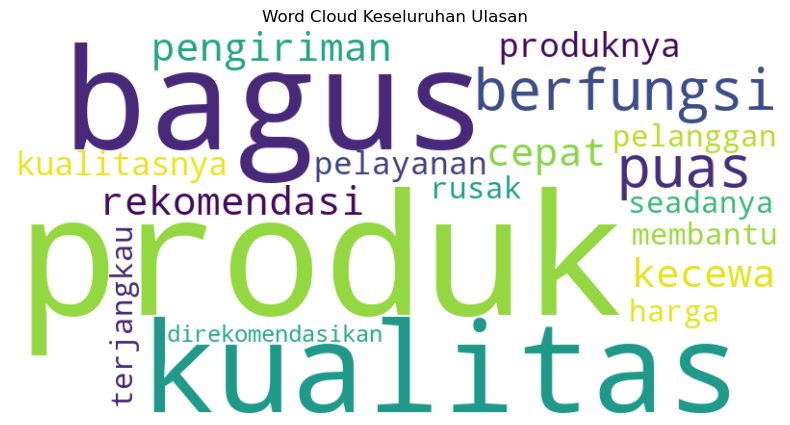

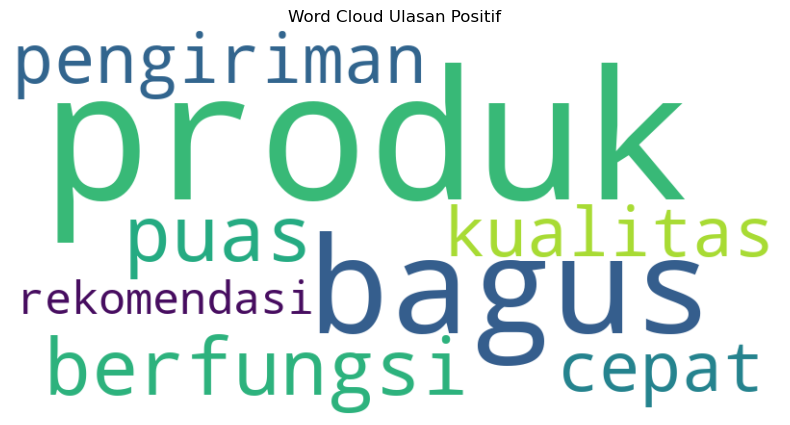

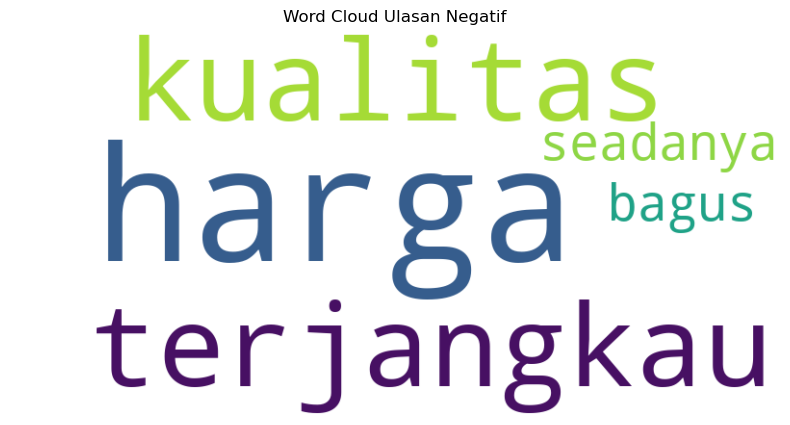


Word clouds telah dibuat dan disimpan di folder 'output'.


In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pastikan Matplotlib menampilkan plot secara inline di Jupyter
%matplotlib inline

# --- Word Cloud Keseluruhan ---
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Keseluruhan Ulasan')
plt.savefig('output/wordcloud_overall.png') # Simpan gambar
plt.show()

# --- Word Cloud untuk Ulasan Positif ---
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_positive_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Ulasan Positif')
plt.savefig('output/wordcloud_positive.png') # Simpan gambar
plt.show()

# --- Word Cloud untuk Ulasan Negatif ---
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_negative_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Ulasan Negatif')
plt.savefig('output/wordcloud_negative.png') # Simpan gambar
plt.show()

print("\nWord clouds telah dibuat dan disimpan di folder 'output'.")


Distribusi Sentimen dalam Data:
label_sentimen
positif    4
negatif    3
netral     1
Name: count, dtype: int64


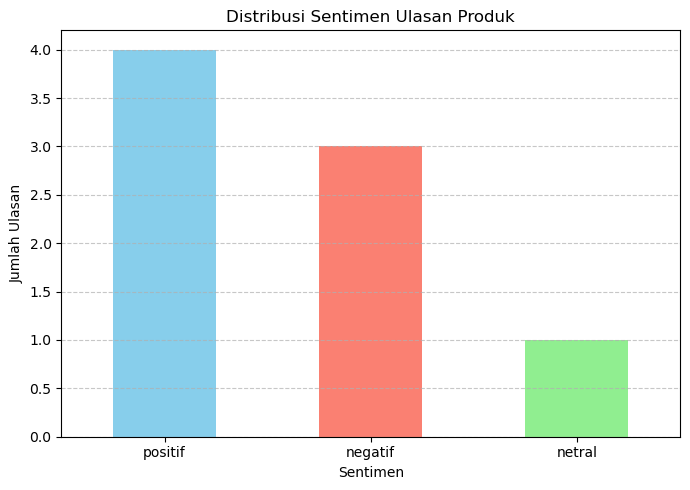

In [31]:
# Ekstrak label sentimen saja (positif, negatif, netral)
def ambil_label(sentimen):
    parts = sentimen.strip().split('.')
    kemungkinan_label = parts[-1].lower()
    if kemungkinan_label in ['positif', 'negatif', 'netral']:
        return kemungkinan_label
    else:
        return sentimen.lower()  # Misalnya kalau datanya cuma "positif"

# Tambahkan kolom baru dengan label yang sudah dibersihkan
df['label_sentimen'] = df['sentimen'].apply(ambil_label)

# Lihat distribusi sentimen yang sudah bersih
print("\nDistribusi Sentimen dalam Data:")
print(df['label_sentimen'].value_counts())

# Visualisasi distribusi sentimen
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
df['label_sentimen'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribusi Sentimen Ulasan Produk')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=0)  # Supaya label tidak miring
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Simpan dan tampilkan grafik
plt.tight_layout()
plt.savefig('output/sentiment_distribution.png')
plt.show()
